In [345]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
##reading csv file
df=pd.read_csv("insurance.csv")

In [347]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [348]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [349]:
df.shape

(1338, 7)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##checking if there any null value

In [352]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [353]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [355]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

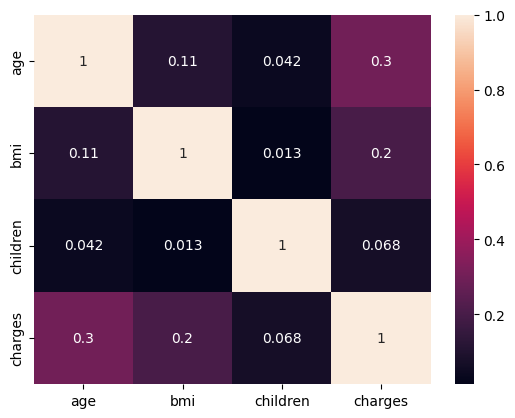

In [356]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

##performing One hot Enccding for String Values


In [357]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ohe=OneHotEncoder()
le=LabelEncoder()

In [358]:
ohe_sex=ohe.fit_transform(df[["sex"]]).toarray()
Sex=pd.DataFrame(ohe_sex,columns=ohe.get_feature_names_out())
df=pd.concat([df,Sex],axis=1)
df=df.drop("sex",axis=1)

In [359]:
df["smoker"]=np.where(df["smoker"].str.contains("yes"),1,0)

In [360]:
df["region"]=le.fit_transform(df["region"])

In [361]:
# le.transform(["southwest"])## --->3
# le.transform(["southeast"])## -->2
# le.transform(["northwest"])## --->1
# le.transform(["northeast"])##--->0

In [362]:
# ohe_region=ohe.fit_transform(df[["region"]]).toarray()
# Region=pd.DataFrame(ohe_region,columns=ohe.get_feature_names_out())
# df=pd.concat([df,Region],axis=1)
# df=df.drop("region",axis=1)

In [363]:
df

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,1,3,16884.92400,1.0,0.0
1,18,33.770,1,0,2,1725.55230,0.0,1.0
2,28,33.000,3,0,2,4449.46200,0.0,1.0
3,33,22.705,0,0,1,21984.47061,0.0,1.0
4,32,28.880,0,0,1,3866.85520,0.0,1.0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,10600.54830,0.0,1.0
1334,18,31.920,0,0,0,2205.98080,1.0,0.0
1335,18,36.850,0,0,2,1629.83350,1.0,0.0
1336,21,25.800,0,0,3,2007.94500,1.0,0.0


<Axes: >

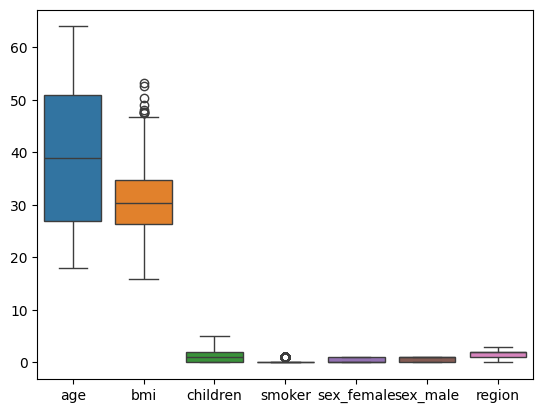

In [364]:
sns.boxplot(df[["age","bmi","children","smoker","sex_female","sex_male","region"]])

##Handling Outliers

In [365]:
df.corr()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
age,1.000000,0.109272,0.042469,-0.025019,0.002127,0.299008,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,0.003750,0.157566,0.198341,-0.046371,0.046371
children,0.042469,0.012759,1.000000,0.007673,0.016569,0.067998,-0.017163,0.017163
smoker,-0.025019,0.003750,0.007673,1.000000,-0.002181,0.787251,-0.076185,0.076185
region,0.002127,0.157566,0.016569,-0.002181,1.000000,-0.006208,-0.004588,0.004588
charges,0.299008,0.198341,0.067998,0.787251,-0.006208,1.000000,-0.057292,0.057292
sex_female,0.020856,-0.046371,-0.017163,-0.076185,-0.004588,-0.057292,1.000000,-1.000000
sex_male,-0.020856,0.046371,0.017163,0.076185,0.004588,0.057292,-1.000000,1.000000


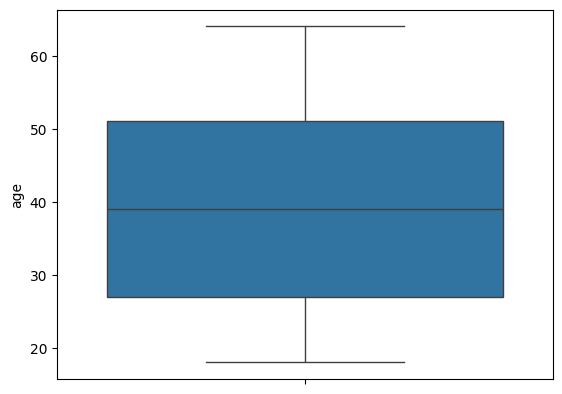

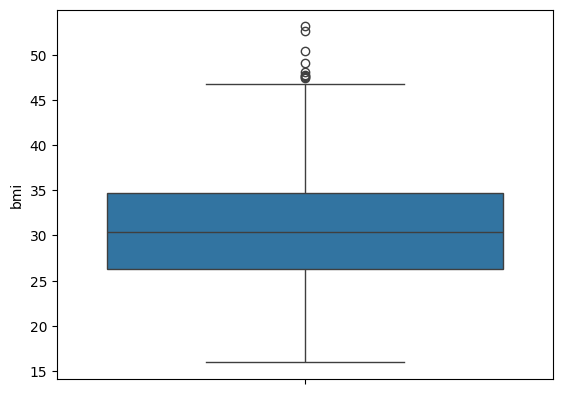

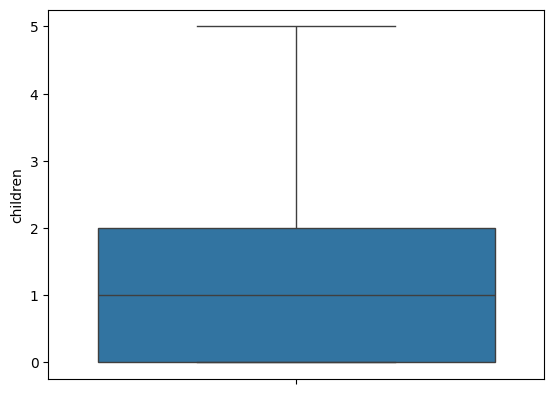

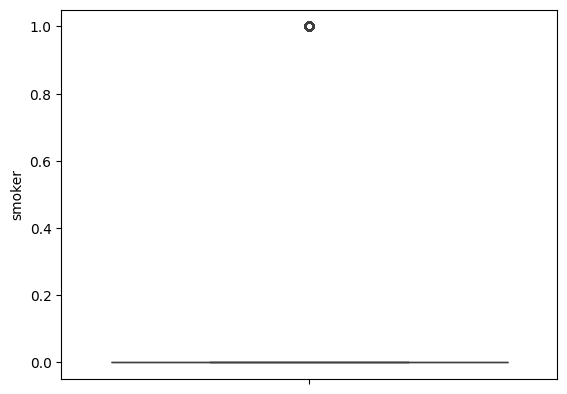

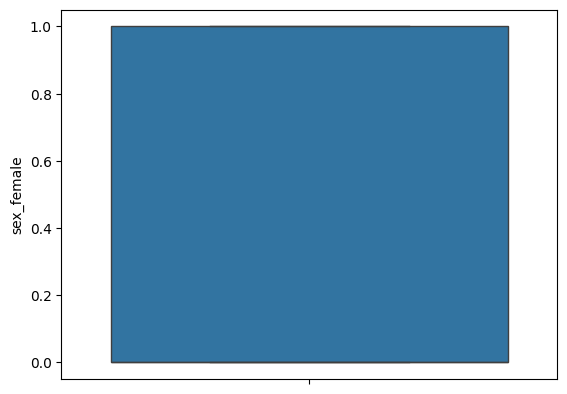

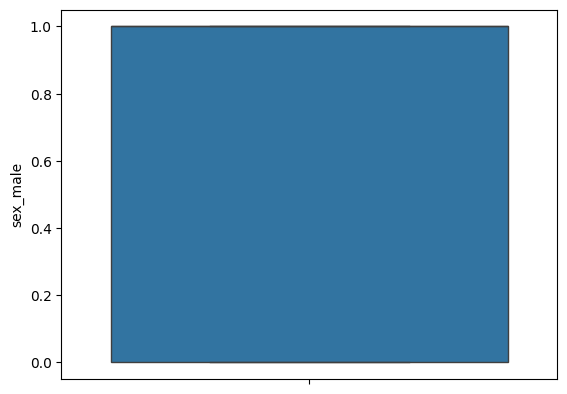

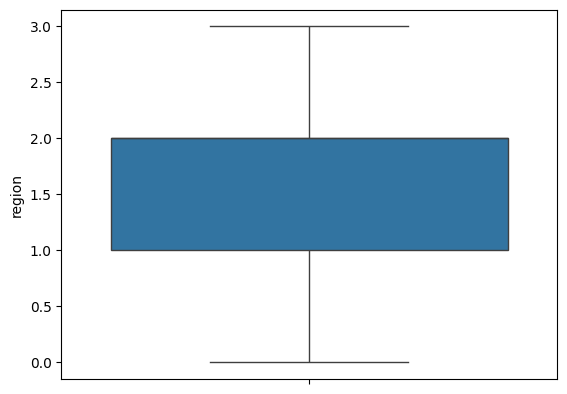

In [366]:
for i in ["age","bmi","children","smoker","sex_female","sex_male","region"]:
    plt.figure()
    sns.boxplot(df[i])

In [367]:
##Outlier Hnadling in BMI

In [374]:
#outlier for bmi
minimum,Q1,median,Q3,maximum=np.quantile(df["bmi"],[0,0.25,0.50,0.75,1.0])
IQR=Q3-Q1
lower_limit=Q1-1.5*(IQR)
higher_limit=Q3+1.5*(IQR)

df["bmi"]=np.where(df["bmi"]>higher_limit,df["bmi"].mean(),np.where(df["bmi"]<lower_limit,lower_limit,df["bmi"]))


<Axes: ylabel='bmi'>

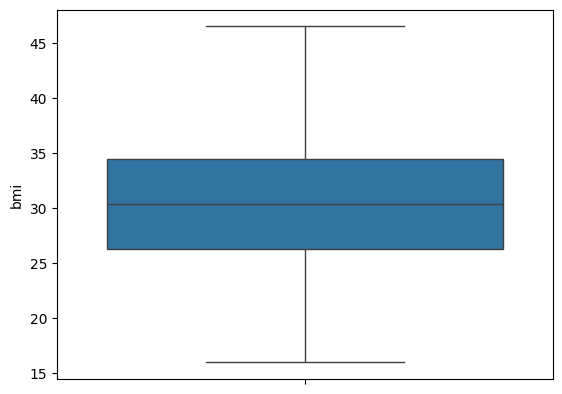

In [375]:
sns.boxplot(df["bmi"])

In [376]:
df.head()

,age,bmi,children,smoker,sex_female,sex_male,region,charges
0,19,27.900,0,1,1.0,0.0,3,16884.92400
1,18,33.770,1,0,0.0,1.0,2,1725.55230
2,28,33.000,3,0,0.0,1.0,2,4449.46200
3,33,22.705,0,0,0.0,1.0,1,21984.47061
4,32,28.880,0,0,0.0,1.0,1,3866.85520


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   smoker      1338 non-null   int32  
 4   sex_female  1338 non-null   float64
 5   sex_male    1338 non-null   float64
 6   region      1338 non-null   int32  
 7   charges     1338 non-null   float64
dtypes: float64(4), int32(2), int64(2)
memory usage: 73.3 KB


In [378]:
##reassigning df in proper way
df=df[["age","bmi","children","smoker","sex_female","sex_male","region","charges"]]

In [379]:
df

,age,bmi,children,smoker,sex_female,sex_male,region,charges
0,19,27.900,0,1,1.0,0.0,3,16884.92400
1,18,33.770,1,0,0.0,1.0,2,1725.55230
2,28,33.000,3,0,0.0,1.0,2,4449.46200
3,33,22.705,0,0,0.0,1.0,1,21984.47061
4,32,28.880,0,0,0.0,1.0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0.0,1.0,1,10600.54830
1334,18,31.920,0,0,1.0,0.0,0,2205.98080
1335,18,36.850,0,0,1.0,0.0,2,1629.83350
1336,21,25.800,0,0,1.0,0.0,3,2007.94500


In [380]:
##Partioning in dependent and Indendent

In [381]:
X=df.iloc[:,:-1]

In [382]:
X

,age,bmi,children,smoker,sex_female,sex_male,region
0,19,27.900,0,1,1.0,0.0,3
1,18,33.770,1,0,0.0,1.0,2
2,28,33.000,3,0,0.0,1.0,2
3,33,22.705,0,0,0.0,1.0,1
4,32,28.880,0,0,0.0,1.0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0.0,1.0,1
1334,18,31.920,0,0,1.0,0.0,0
1335,18,36.850,0,0,1.0,0.0,2
1336,21,25.800,0,0,1.0,0.0,3


In [383]:
y=df[["charges"]]

In [384]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [416]:
X.shape,y.shape

((1338, 7), (1338, 1))

In [385]:
##Performing train test split

In [386]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [387]:
X_train

,age,bmi,children,smoker,sex_female,sex_male,region
161,18,36.850,0,1,1.0,0.0,2
1032,30,27.930,0,0,1.0,0.0,0
151,48,29.700,0,0,0.0,1.0,2
759,18,38.170,0,1,0.0,1.0,2
362,19,21.700,0,1,1.0,0.0,3
...,...,...,...,...,...,...,...
278,59,31.790,2,0,0.0,1.0,2
432,42,26.900,0,0,0.0,1.0,3
1283,18,30.030,1,0,0.0,1.0,2
1265,64,23.760,0,1,0.0,1.0,2


In [388]:
X_test

,age,bmi,children,smoker,sex_female,sex_male,region
936,44,29.735,2,0,0.0,1.0,0
728,18,40.280,0,0,1.0,0.0,0
1307,32,28.120,4,1,0.0,1.0,1
924,43,23.200,0,0,0.0,1.0,3
137,22,25.175,0,0,0.0,1.0,1
...,...,...,...,...,...,...,...
224,42,24.640,0,1,0.0,1.0,2
1245,28,24.300,5,0,0.0,1.0,3
1086,55,28.975,0,0,0.0,1.0,0
912,59,26.695,3,0,1.0,0.0,1


In [389]:
y_test

,charges
936,32108.66282
728,2217.60120
1307,21472.47880
924,6250.43500
137,2045.68525
...,...
224,19515.54160
1245,5615.36900
1086,10796.35025
912,14382.70905


In [390]:
y_train

,charges
161,36149.48350
1032,4137.52270
151,7789.63500
759,36307.79830
362,13844.50600
...,...
278,12928.79110
432,5969.72300
1283,1720.35370
1265,26926.51440


In [391]:
for i in [X_train,X_test,y_train,y_test]:
    print(i.shape,end="")

(1070, 7)(268, 7)(1070, 1)(268, 1)

In [392]:
##performing Scaling 

In [393]:
from sklearn.preprocessing import StandardScaler

In [394]:
ss=StandardScaler()

In [395]:
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

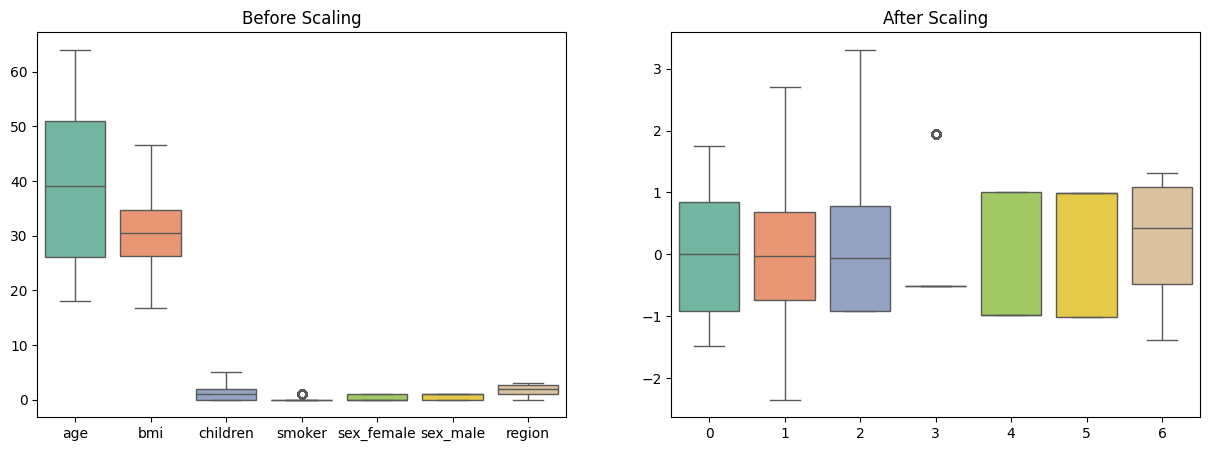

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)  
sns.boxplot(data=X_train, palette='Set2')
plt.title('Before Scaling')

plt.subplot(1,2,2)  
sns.boxplot(data=X_train_scaled, palette='Set2')
plt.title('After Scaling')
plt.show()

In [397]:
##perorming Linear Regression Model on scaled data

In [398]:
from sklearn.linear_model import LinearRegression

In [399]:
lr=LinearRegression()

In [402]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [403]:
y_pred_tr=lr.predict(X_train_scaled)
y_pred_test=lr.predict(X_test_scaled)

In [412]:
slope = lr.coef_
print("slope is :",slope)
intercept=lr.intercept_
print("Intercept is :",intercept)

slope is : [[3745.03167594 1988.65305826  490.88326061 9715.74997694   11.06572633
   -11.06572633 -207.71667147]]
Intercept is : [13313.94077712]


In [307]:
from sklearn.metrics import mean_absolute_error,r2_score

In [410]:
mae=mean_absolute_error(y_test,y_pred_test)

In [411]:
print("Mean Absolute Error is : ",mae)

Mean Absolute Error is :  4289.045399027271


In [309]:
print("Training accuracy",r2_score(y_train,y_pred_tr))
print("Test accuracy",r2_score(y_test,y_pred_test))

Training accuracy 0.7583908139727358
Test accuracy 0.7110604364201077


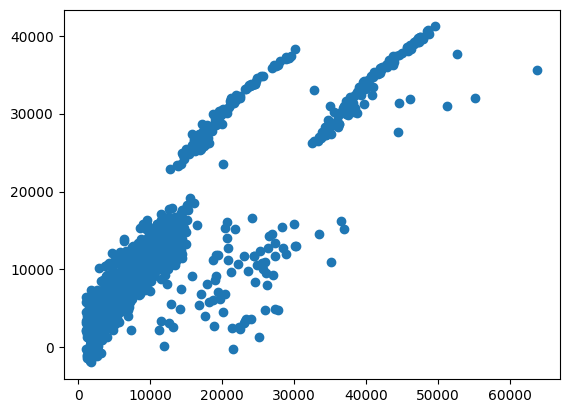

In [405]:
plt.scatter(y_train,y_pred_tr)

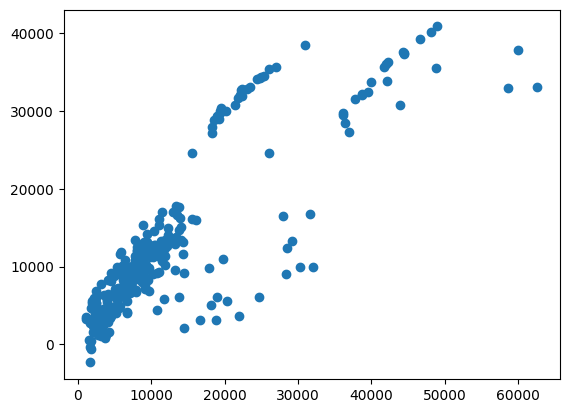

In [417]:
plt.scatter(y_test,y_pred_test)

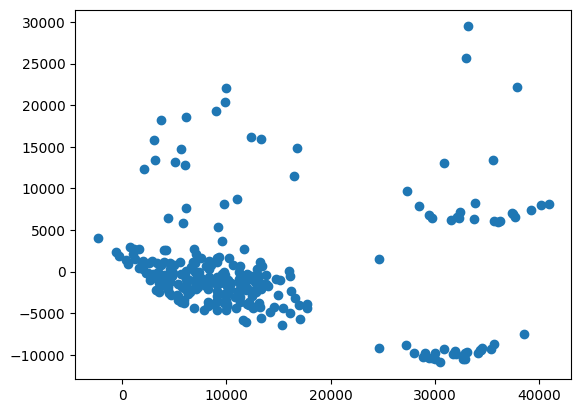

In [419]:
residual=y_test-y_pred_test
plt.scatter(y_pred_test,residual)

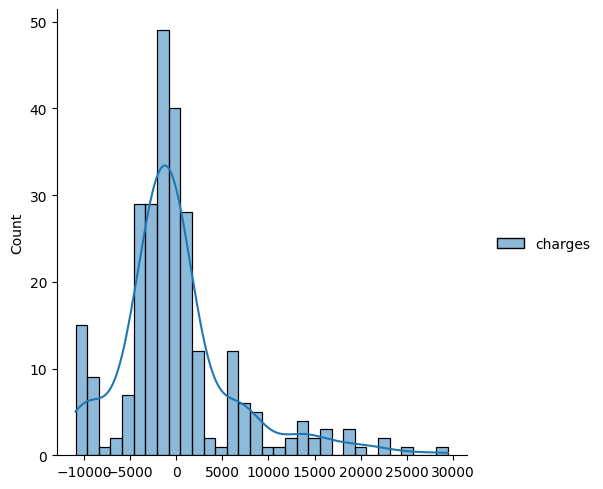

In [420]:
sns.displot(residual,kde=True)